In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tadasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ripser
import persim
from persim import wasserstein

In [51]:
def plot_sphere(sphere, c=None, ax=None):
    ax = ax or plt.subplot(111)
    ax.scatter(sphere[:,0], sphere[:,1], s=3,c=c, alpha=0.5)
    ax.axis('square')
    ax.axis('off')


In [52]:
sphere0 = tadasets.dsphere(n=1000, d=1)
sphere1 = tadasets.dsphere(n=1000, d=1, noise=0.1)
sphere2 = tadasets.dsphere(n=1000, d=1, noise=0.2)

Text(0.5, 1.0, 'Noise = 0.2')

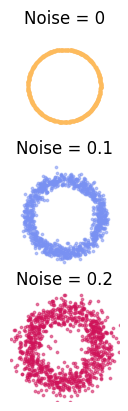

In [80]:
r = 1.5
ax = plt.subplot(311)
plot_sphere(sphere0, c="#FDBB5D", ax=ax)
ax.set_xlim([-r,r])
ax.set_ylim([-r,r])
plt.title("Noise = 0")

ax = plt.subplot(312)
plot_sphere(sphere1, c="#7991F2", ax=ax)
ax.set_xlim([-r,r])
ax.set_ylim([-r,r])
plt.title("Noise = 0.1")

ax = plt.subplot(313)
plot_sphere(sphere2, c="#CF1259", ax=ax)
ax.set_xlim([-r,r])
ax.set_ylim([-r,r])
plt.title("Noise = 0.2")

In [30]:
dgms0 = ripser.ripser(sphere0, maxdim=1)['dgms']
dgms1 = ripser.ripser(sphere1, maxdim=1)
dgms2 = ripser.ripser(sphere2, maxdim=1)

In [31]:
d, (mi, D) = wasserstein.wasserstein(dgms0['dgms'][1], dgms1['dgms'][1], matching=True)

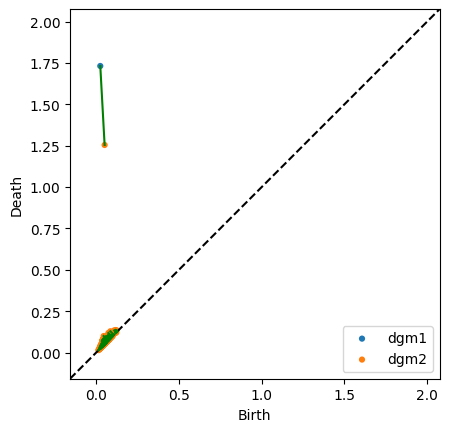

In [32]:
persim.wasserstein_matching(dgms0['dgms'][1], dgms1['dgms'][1], mi, labels=["dgm1", "dgm2"], ax=None)

In [ ]:
d, (mi, D) = wasserstein.wasserstein(dgms0['dgms'][1], dgms2['dgms'][1], matching=True)

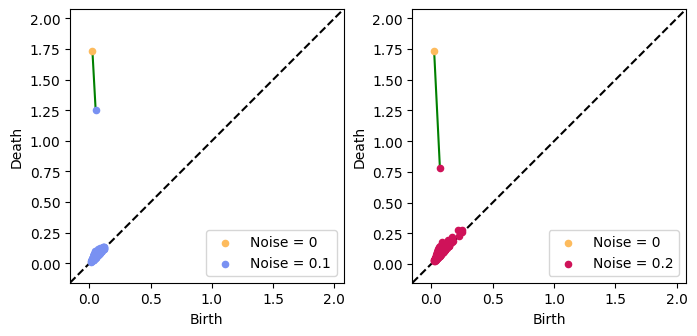

In [83]:
plt.figure(figsize=(7,3.5))
ax = plt.subplot(121)
d, (mi, D) = wasserstein.wasserstein(dgms0['dgms'][1], dgms1['dgms'][1], matching=True)
persim.wasserstein_matching(dgms0['dgms'][1], dgms1['dgms'][1], mi, palette=["#FDBB5D", "#7991F2", "#CF1259", "#", "#DD7596"]
, labels=["Noise = 0", "Noise = 0.1"], ax=ax)

ax = plt.subplot(122)
d, (mi, D) = wasserstein.wasserstein(dgms0['dgms'][1], dgms2['dgms'][1], matching=True)
persim.wasserstein_matching(dgms0['dgms'][1], dgms2['dgms'][1], mi, palette = ["#FDBB5D", "#CF1259", "#FDBB5D", "#DD7596"]
,labels=["Noise = 0", "Noise = 0.2"], ax=ax)

plt.tight_layout()